<a href="https://colab.research.google.com/github/Yuvaranii/Data_Preprocessing/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/Yuvaranii/Data_Preprocessing/main/Social_Network_Ads.csv")

In [ ]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
Data.drop(["User ID"], axis = 1, inplace = True)

In [ ]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Column = ["Gender"]
Data["Gender"] = Data[Column].apply(Encoder.fit_transform)

In [ ]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
X = Data[["Gender",	"Age"	, "EstimatedSalary"]]
Y = Data["Purchased"]

**Splitting the dataset into the Training set and Test set**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [ ]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
from sklearn import svm
Model = svm.SVC()
Res = Model.fit(X_train, Y_train)

**Predicting the Test set results**

In [ ]:
Res.score(X_test, Y_test)

0.925

In [ ]:
Res.predict([[0,26, 430000]])

array([1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
Y_Pred = Res.predict(X_test)
CM = confusion_matrix(Y_Pred, Y_test)
CM

array([[48,  2],
       [ 4, 26]])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**Visualising the Test set results**

Text(33.0, 0.5, 'Truth')

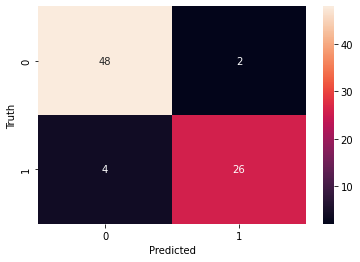

In [ ]:
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")